In [1]:
from diffusers import StableDiffusionXLControlNetXSPipeline, ControlNetXSModel, AutoencoderKL
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image

In [2]:
prompt = "aerial view, a futuristic research complex in a bright foggy jungle, hard lighting"
negative_prompt = "low quality, bad quality, sketches"

# download an image
image = load_image(
    "https://hf.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd_controlnet/hf-logo.png"
)

In [3]:
# initialize the models and pipeline
controlnet_conditioning_scale = 0.5  # recommended for good generalization
controlnet = ControlNetXSModel.from_pretrained(
    "UmerHA/ConrolNetXS-SDXL-canny", torch_dtype=torch.float16
)
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = StableDiffusionXLControlNetXSPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", controlnet=controlnet, vae=vae, torch_dtype=torch.float16
)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# get canny image
image = np.array(image)
image = cv2.Canny(image, 100, 200)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

In [5]:
# generate image
image = pipe(
    prompt, controlnet_conditioning_scale=controlnet_conditioning_scale, image=canny_image
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

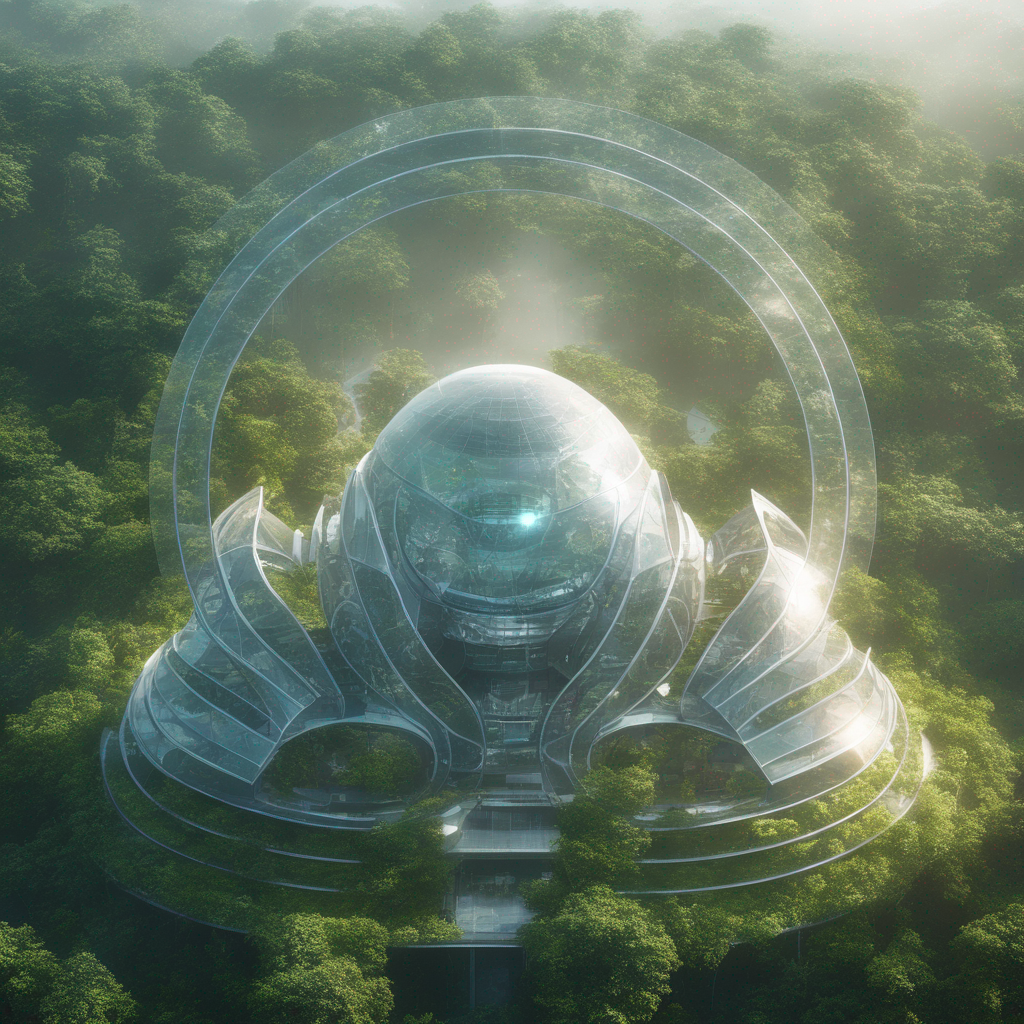

In [6]:
image